In [1]:
import sys,os,inspect

import matplotlib.pyplot as plt
sys.path.append("C:/Users/righi/OneDrive/Desktop/FastestLap/v0.5/include")
import fastest_lap
from fastest_lap import KMH

In [2]:
# Load vehicle
vehicle_name = "car"
fastest_lap.create_vehicle_from_xml(vehicle_name, "C:/Users/righi/OneDrive/Desktop/FastestLap/v0.5/database/vehicles/f1/mercedes-2020-catalunya.xml");

In [3]:
# Load track
track="catalunya"
fastest_lap.create_track_from_xml(track,"C:/Users/righi/OneDrive/Desktop/FastestLap/v0.5/database/tracks/catalunya/catalunya_adapted.xml");
s=fastest_lap.track_download_data(track,"arclength");

In [4]:
# Compute optimal laptime
options  = "<options>"
options += "    <output_variables>"
options += "        <prefix>run/</prefix>"
options += "    </output_variables>"
options += "    <print_level> 5 </print_level>"
options += "</options>"

run = fastest_lap.download_variables(*fastest_lap.optimal_laptime(vehicle_name,track,s,options));

x        = run["chassis.position.x"];
y        = run["chassis.position.y"];
delta    = run["front-axle.steering-angle"];
throttle = run["chassis.throttle"];
u        = run["chassis.velocity.x"];
s        = run["road.arclength"];
time     = run["time"];
psi      = run["chassis.attitude.yaw"];
omega    = run["chassis.omega.z"];
v        = run["chassis.velocity.y"];

fastest_lap.delete_variable("run/*")

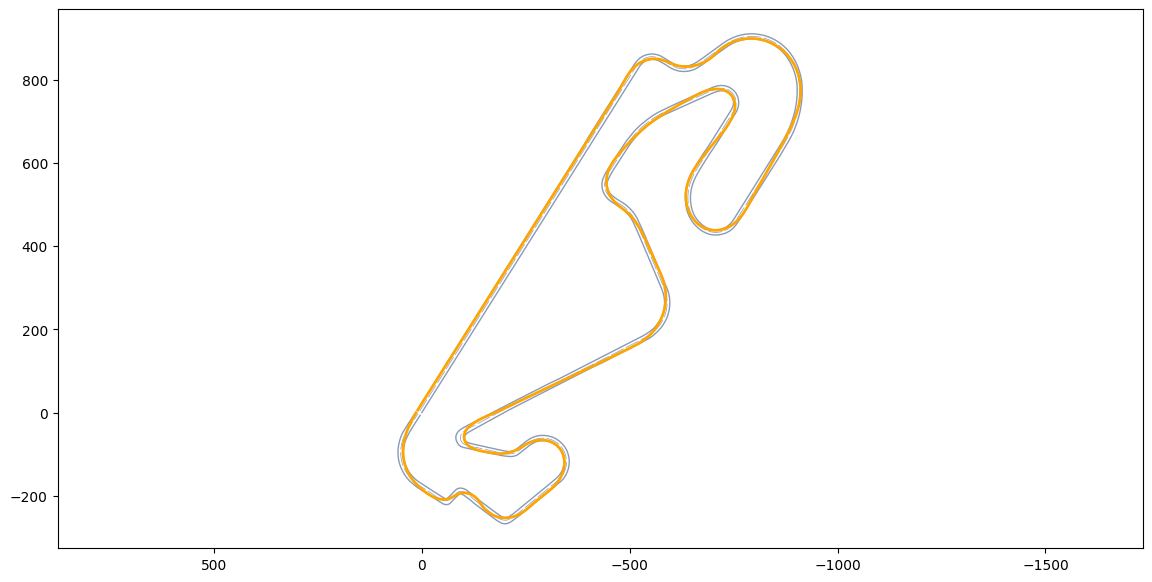

In [5]:
import numpy as np
fastest_lap.plot_optimal_laptime(s,x,y,track);
plt.gca().invert_xaxis()